## Using Data Analytics to Manage a Solar Power Plant
<font size='+1'> 
In this analysis, we will be examining 34 days of power generation and sensor reading data from a solar power plant in India with the following goals:  
    
1.  Predict the power generation for the nex few days 
2.  Identify the need for panel cleaning/maintenance
3.  Identify faulty or suboptimal equipment performance

We will be using data analytics skills and python to perform this analysis with the following workflow: 

* Conducting Exploratoy Data Analysis (EDA) to gain insights into the data. This will involve :  
   * Describing the data
   * Visualizing the data
   * Exploring correlations between numerical features
* Performing feature engineering and data wrangling to prepare the data for modeling. 
    
Our goal is to demonstrate how data analysis tools can be used to gain a better understanding of the power generation patterns in a solar power plant and to identify ways to improve  performance. 
    </font>


Data source: 

* /kaggle/input/solar-power-generation-data/Plant_1_Weather_Sensor_Data.csv
* /kaggle/input/solar-power-generation-data/Plant_1_Generation_Data.csv

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
from datetime import datetime
import matplotlib.dates as mdates 

In [2]:
custom_date_parser = lambda x: datetime.strptime(x, '%d-%m-%Y %H:%M') 
gen1=pd.read_csv('/kaggle/input/solar-power-generation-data/Plant_1_Generation_Data.csv',index_col='DATE_TIME', parse_dates=['DATE_TIME'], date_parser=custom_date_parser)
gen1=gen1.resample('15min').sum()

gen1.head()

,PLANT_ID,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
DATE_TIME,,,,,
2020-05-15 00:00:00,86835021,0.0,0.0,0.0,143581676.0
2020-05-15 00:15:00,86835021,0.0,0.0,0.0,143581676.0
2020-05-15 00:30:00,86835021,0.0,0.0,0.0,143581676.0
2020-05-15 00:45:00,86835021,0.0,0.0,0.0,143581676.0
2020-05-15 01:00:00,90970022,0.0,0.0,0.0,150761642.0


In [3]:
gen1.groupby('DATE_TIME').count().head()

,PLANT_ID,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
DATE_TIME,,,,,
2020-05-15 00:00:00,1,1,1,1,1
2020-05-15 00:15:00,1,1,1,1,1
2020-05-15 00:30:00,1,1,1,1,1
2020-05-15 00:45:00,1,1,1,1,1
2020-05-15 01:00:00,1,1,1,1,1


<font size='+1'>  Upon examining the first few lines of the 'gen1' dataset, it appears that there are duplicates in the DATE_TIME column. By grouping the dataset by the DATE_TIME columns and counting the number of occurrences, we can see that data has been recorded every 15 minutes and there are 21 or 22 data points in each 15-minute interval. </font>

In [4]:
gen1.info(), gen1.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3264 entries, 2020-05-15 00:00:00 to 2020-06-17 23:45:00
Freq: 15T
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PLANT_ID     3264 non-null   int64  
 1   DC_POWER     3264 non-null   float64
 2   AC_POWER     3264 non-null   float64
 3   DAILY_YIELD  3264 non-null   float64
 4   TOTAL_YIELD  3264 non-null   float64
dtypes: float64(4), int64(1)
memory usage: 153.0 KB


(None,
 PLANT_ID       0
 DC_POWER       0
 AC_POWER       0
 DAILY_YIELD    0
 TOTAL_YIELD    0
 dtype: int64)

In [5]:
custom_date_parser = lambda x: datetime.strptime(x, '%Y-%m-%d %H:%M:%S') 
sen1=pd.read_csv('/kaggle/input/solar-power-generation-data/Plant_1_Weather_Sensor_Data.csv',index_col='DATE_TIME', parse_dates=['DATE_TIME'], date_parser=custom_date_parser)
sen1.drop(['PLANT_ID','SOURCE_KEY'],axis=1, inplace=True)
sen1.head()

,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
DATE_TIME,,,
2020-05-15 00:00:00,25.184316,22.857507,0.0
2020-05-15 00:15:00,25.084589,22.761668,0.0
2020-05-15 00:30:00,24.935753,22.592306,0.0
2020-05-15 00:45:00,24.846130,22.360852,0.0
2020-05-15 01:00:00,24.621525,22.165423,0.0


In [6]:
sen1.info(), sen1.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3182 entries, 2020-05-15 00:00:00 to 2020-06-17 23:45:00
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   AMBIENT_TEMPERATURE  3182 non-null   float64
 1   MODULE_TEMPERATURE   3182 non-null   float64
 2   IRRADIATION          3182 non-null   float64
dtypes: float64(3)
memory usage: 99.4 KB


(None,
 AMBIENT_TEMPERATURE    0
 MODULE_TEMPERATURE     0
 IRRADIATION            0
 dtype: int64)

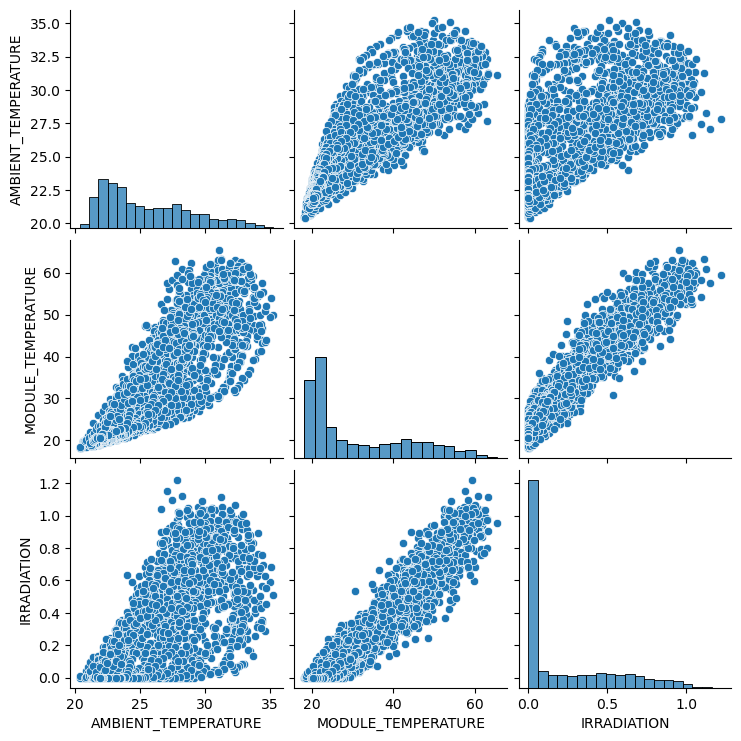

In [7]:
sns.pairplot(sen1)

<AxesSubplot:>

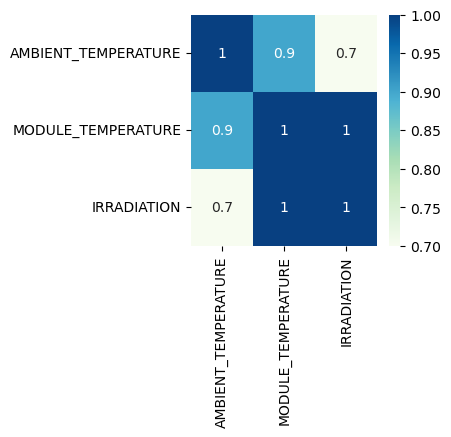

In [8]:
plt.figure(figsize=(3,3))
sns.heatmap(sen1.corr().round(1),cmap='GnBu',annot=True)  #list of cmap options: https://medium.com/@morganjonesartist/color-guide-to-seaborn-palettes-da849406d44f

<font size='+1'>
    
    The pairplots and correlation heatmap clearly demonstrate that:
        
        1. The correlation between module temperature and irradiation is stronger compared to that between ambient temperature and irradiation.
        2. The module temperature can reach significantly higher levels than ambient temperature, up to approximately twice as high   
</font>



(array([18395., 18399., 18403., 18407., 18411., 18414., 18418., 18422.,
        18426., 18430.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

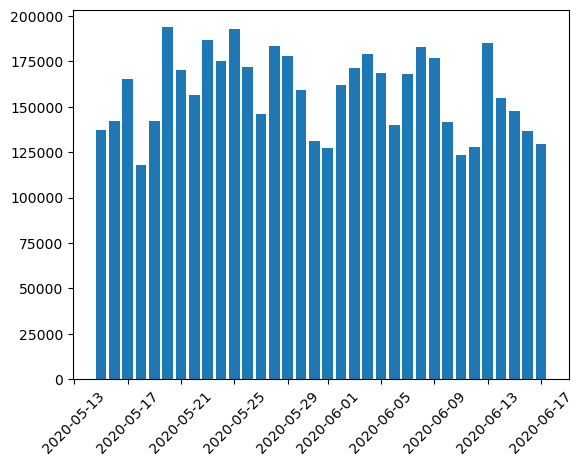

In [9]:
plt.bar(x=gen1.index.date, height=gen1.DAILY_YIELD)
plt.xticks(rotation=45)

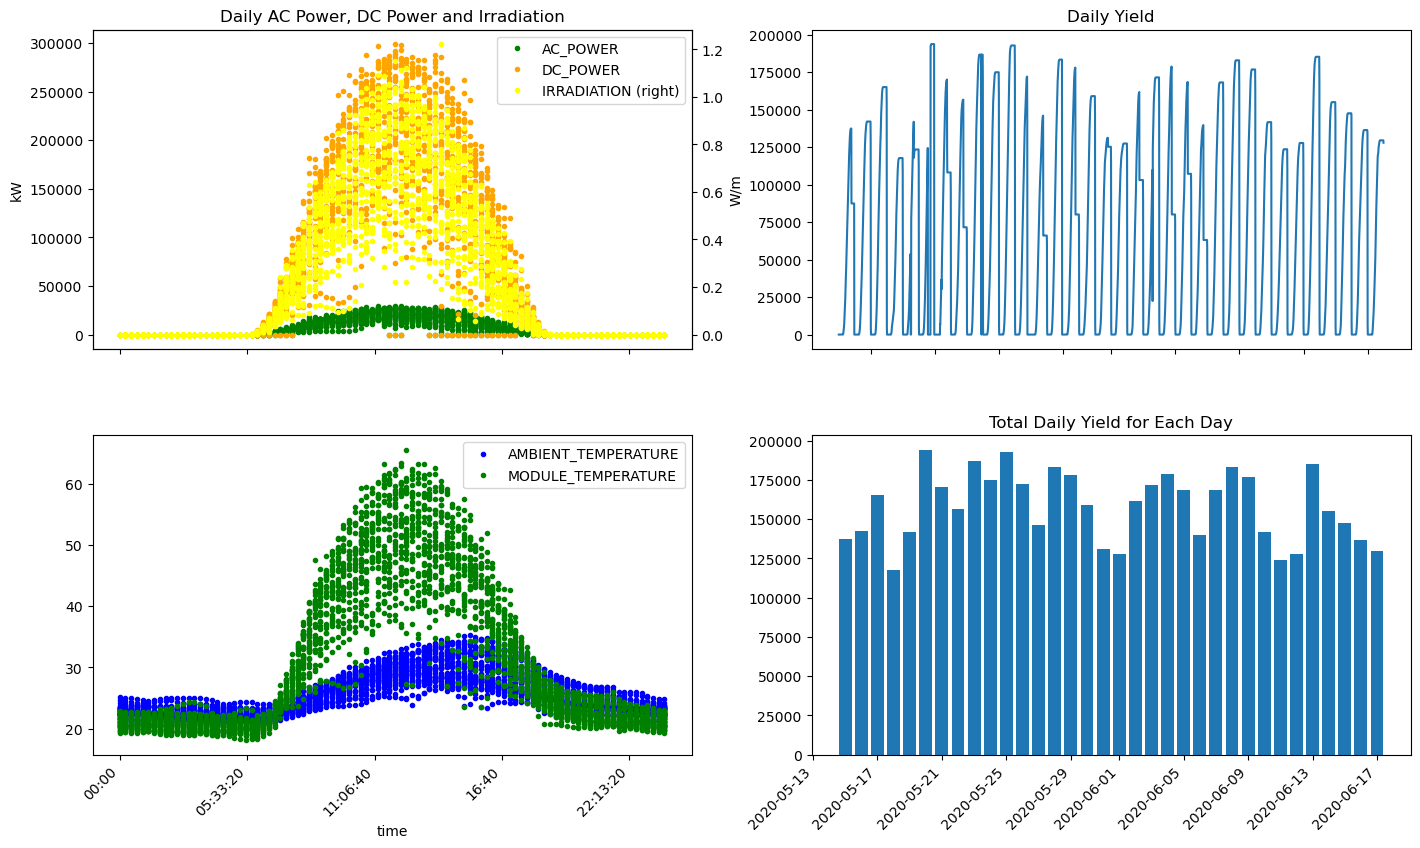

In [10]:
#gen1=gen1.resample('15min').sum()
gen1['time']=gen1.index.time
sen1['time']=sen1.index.time

f,ax=plt.subplots(2,2, figsize=(15,10))
plt.tight_layout(pad=5)

gen1.plot(x='time',y='AC_POWER', style='.',color='green',ax=ax[0,0])
gen1.plot(x='time',y='DC_POWER', style='.',color='orange', ax=ax[0,0])
sen1.plot(x='time',y='IRRADIATION', style='.',color='yellow', ax=ax[0,0],secondary_y=True)

ax[0,1].plot(gen1.DAILY_YIELD)
#sen1[['AMBIENT_TEMPERATURE','MODULE_TEMPERATURE']]['2020-05-15 00:00:00':'2020-05-15 23:45:00'].plot(ax=ax[1,0])
sen1.plot(x='time',y='AMBIENT_TEMPERATURE', style='.',color='blue', ax=ax[1,0])
sen1.plot(x='time',y='MODULE_TEMPERATURE', style='.',color='green', ax=ax[1,0])

ax[1,1].bar(x=gen1.index.date, height=gen1.DAILY_YIELD)

#plt.xticks(rotation=45)
#gen1.resample('D').sum().DAILY_YIELD.plot(kind='bar', ax=ax[1,1])
#ax[1,1].xaxis.set_major_locator(mdates.DayLocator(interval=2))
#ax[1,1].xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
#plt.setp(ax[0,1].get_xticklabels(), rotation=30, ha='right')
#plt.setp(ax[1,1].get_xticklabels(), rotation=30, ha='right')

ax[0,0].set_title('Daily AC Power, DC Power and Irradiation')
ax[0,1].set_title('Daily Yield')
ax[1,1].set_title('Total Daily Yield for Each Day')

ax[0,0].set_ylabel('kW')
ax[0,0].right_ax.set_ylabel('W/m')
f.subplots_adjust(wspace=0.2)

f.autofmt_xdate(rotation=45)


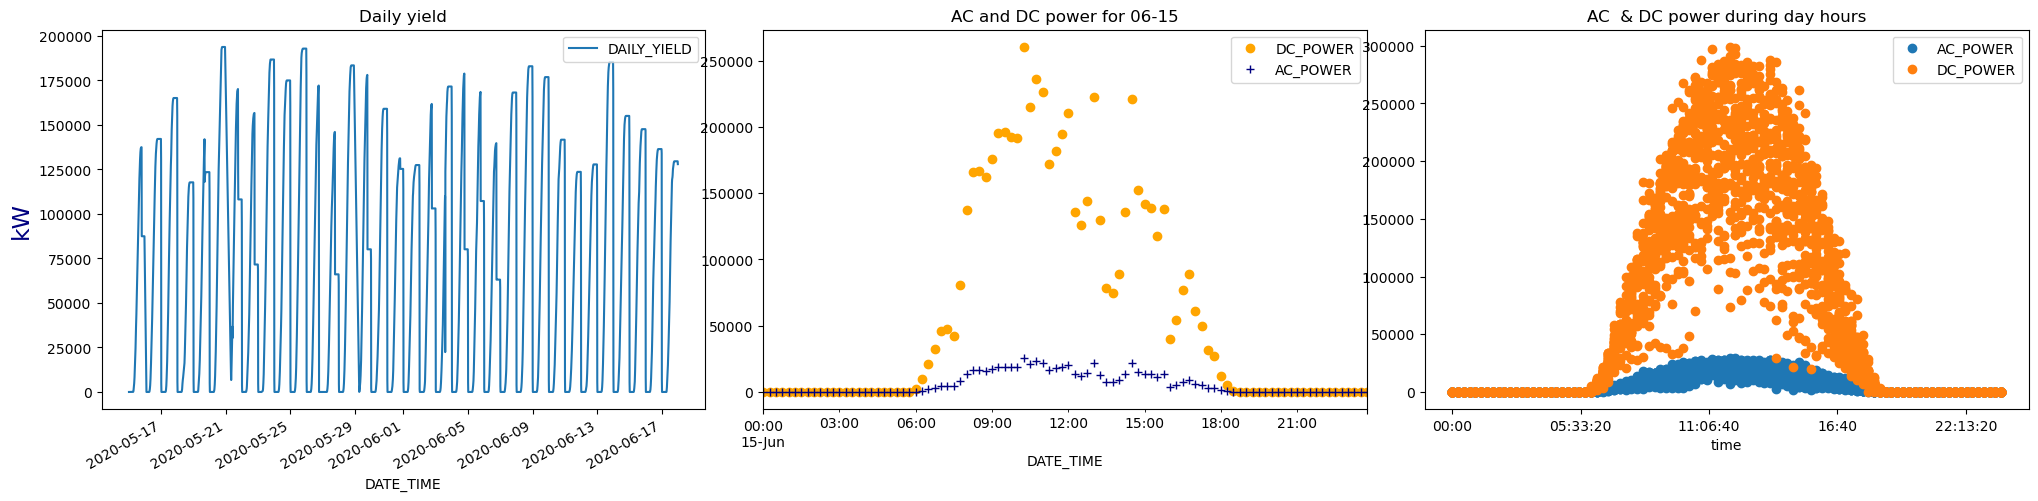

In [11]:
gen1=pd.read_csv('/kaggle/input/solar-power-generation-data/Plant_1_Generation_Data.csv')
gen1.DATE_TIME=pd.to_datetime(gen1.DATE_TIME,format='%d-%m-%Y %H:%M')
gen11=gen1.groupby('DATE_TIME').sum().reset_index()

f,ax=plt.subplots(1,3,dpi=100,figsize=(20,5))
plt.tight_layout()
gen11.plot(x='DATE_TIME',y='DAILY_YIELD',ax=ax[0])
gen11[(gen11.DATE_TIME.dt.day==15) &(gen11.DATE_TIME.dt.month==6)].plot(x='DATE_TIME',y='DC_POWER',color='orange',style='o',ax=ax[1])
gen11[(gen11.DATE_TIME.dt.day==15) &(gen11.DATE_TIME.dt.month==6)].plot(x='DATE_TIME',y='AC_POWER',color='navy',style='+',ax=ax[1])

import datetime as dt 
gen11['time']=gen11.DATE_TIME.dt.time
gen11.set_index('time')[['AC_POWER','DC_POWER']].plot(style='o',ax=ax[2])

ax[0].set_title('Daily yield',)
ax[1].set_title('AC and DC power for 06-15')
ax[2].set_title('AC  & DC power during day hours')
ax[0].set_ylabel('kW',color='navy',fontsize=17)
plt.show()